# Лабораторная работа №4
`ФИО: Чмурова Мария Владиславовна` </b>
`Группа: P3332` </b>
## 1. Предварительная обработка данных
### Обработка отсутствующих значений:


In [3]:
# №1. Обработка отсутствующих значений

print("\n 1. Обработка отсутствующих значений: \n")
print(data_frame.isnull().sum())
print()


 1. Обработка отсутствующих значений: 

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64



Таким образом, можно сделать вывод, что датасет **полностью заполнен**. </br> 
Следовательно, не нужно заполнять пропуски, так как их нет. 
### Кодирование категориальных признаков
Так как датасет не имеет нечисловых значений, то кодировать категориальные признаки не нужно. Так как их **нет**.
### Нормировка 
Необходима, так как некоторые алгоритмы могут быть чувствительны к масштабу признаков. </br>
**mix-max нормализация**: приводим все значения к диапазону от 0 до 1:
$$
x_{norm} = \frac{x-x_{min}}{x_{max}-x_{min}}
$$

$x$ — исходное значение признака.  
$x_{min}$ и $x_{max}$ — минимальные и максимальные значения признака соответственно.

In [4]:
# №2. Нормировка

def min_max_normalize(column):
    return (column - np.min(column)) / (np.max(column) - np.min(column))

columns_to_scale = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Pedigree', 'Age']

for col in columns_to_scale:
    data_frame[col] = min_max_normalize(data_frame[col])

print("\n 2. Нормировка: \n")
print(data_frame.head())
print()


 2. Нормировка: 

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1     0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2     0.470588  0.919598       0.524590       0.000000  0.000000  0.347243   
3     0.058824  0.447236       0.540984       0.232323  0.111111  0.418778   
4     0.000000  0.688442       0.327869       0.353535  0.198582  0.642325   

   Pedigree       Age  Outcome  
0  0.234415  0.483333        1  
1  0.116567  0.166667        0  
2  0.253629  0.183333        1  
3  0.038002  0.000000        0  
4  0.943638  0.200000        1  



## 2. Получение статистики по датасету

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_frame = pd.read_csv('diabetes.csv')

# №3. Получение статистики по датасету

pd.set_option('display.max_columns', None)
print("\n 3. Получение статистики по датасету: \n")
print(data_frame.describe())
print()


 3. Получение статистики по датасету: 

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI    Pedigree         Age     Outcome  
count  768.000000  768.000000  768.000000  768.000000  
mean    31.992578    0.471876   33.240885    0.348958  
std      7.884160    0.331329   11.760232    0.476951  
min      0.000000    0.078000   21.000000    0.000

Проанализируем полученную статистику: </br>

**Количество элементов в датасете**: count = 768

**Среднее значение**: mean =
  - 3.845 - среднее количество беременностей.
  - 120.89 - средний уровень глюкозы.
  - 69.11 - среднее артериальное давление.
  - 20.54 - средняя толщина кожи.
  - 79.80 - средний уровень инсулина.
  - 31.99 - средний индекс массы тела (BMI).
  - 0.4719 - средний генетический индекс (Pedigree).
  - 33.24 - средний возраст участников.
  - 0.349 - средний результат по исходу (Outcome). 

**Стандартное отклонение**: std =
  - 3.37 - отклонение по количеству беременностей.
  - 31.97 - отклонение по уровню глюкозы.
  - 19.36 - отклонение по артериальному давлению.
  - 15.95 - отклонение по толщине кожи.
  - 115.24 - отклонение по уровню инсулина.
  - 7.88 - отклонение по индексу массы тела.
  - 0.33 - отклонение по генетическому индексу.
  - 11.76 - отклонение по возрасту.
  - 0.48 - отклонение по исходу (Outcome).

**Минимум**: min =
  - 0.0 - минимальное количество беременностей.
  - 0.0 - минимальный уровень глюкозы.
  - 0.0 - минимальное артериальное давление.
  - 0.0 - минимальная толщина кожи.
  - 0.0 - минимальный уровень инсулина.
  - 0.0 - минимальный индекс массы тела.
  - 0.078 - минимальный генетический индекс.
  - 21.0 - минимальный возраст.
  - 0.0 - минимальный результат по исходу.

**Максимум** max =
  - 17.0 - максимальное количество беременностей.
  - 199.0 - максимальный уровень глюкозы.
  - 122.0 - максимальное артериальное давление.
  - 99.0 - максимальная толщина кожи.
  - 846.0 - максимальный уровень инсулина.
  - 67.10 - максимальный индекс массы тела.
  - 2.42 - максимальный генетический индекс.
  - 81.0 - максимальный возраст.
  - 1.0 - максимальный результат по исходу.

### Визуализация статистики по датасету:


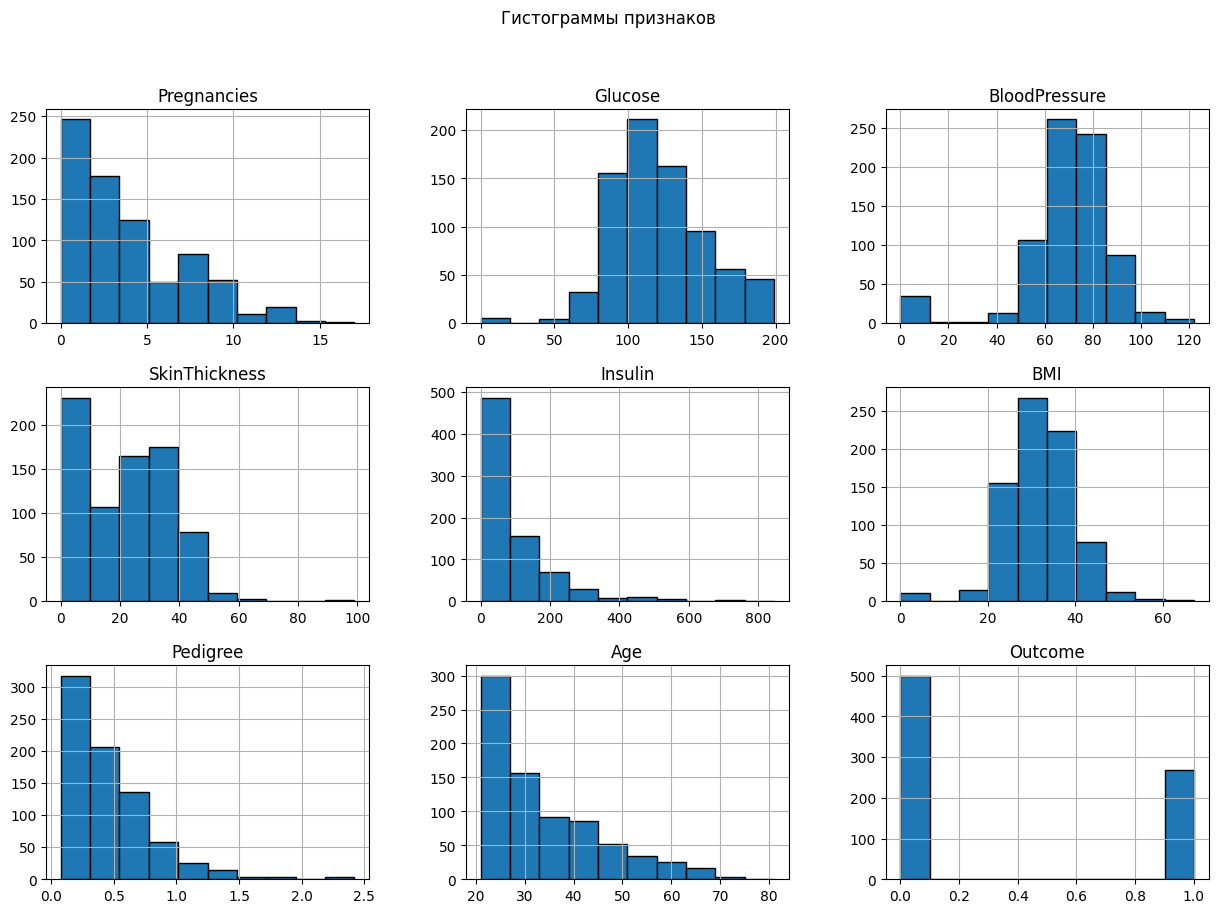

In [6]:
# №4. Визуализация статистики по датасету
data_frame.hist(figsize=(15, 10), edgecolor='black')
plt.suptitle("Гистограммы признаков")
plt.show()


### Построение 3D-визуализации признаков

Разделим датасет на 2 класса: 
- Люди с диабетом (data_frame['Outcome'] == 1)
- Люди без диабета (data_frame['Outcome'] == 0)

Для них составим визуализацию признаков в разных комбинациях: 
- Glucose, BMI, Age
- BloodPressure, SkinThickness, Age
- Insulin, BMI, Pedigree
- Pregnancies, BloodPressure, Insulin

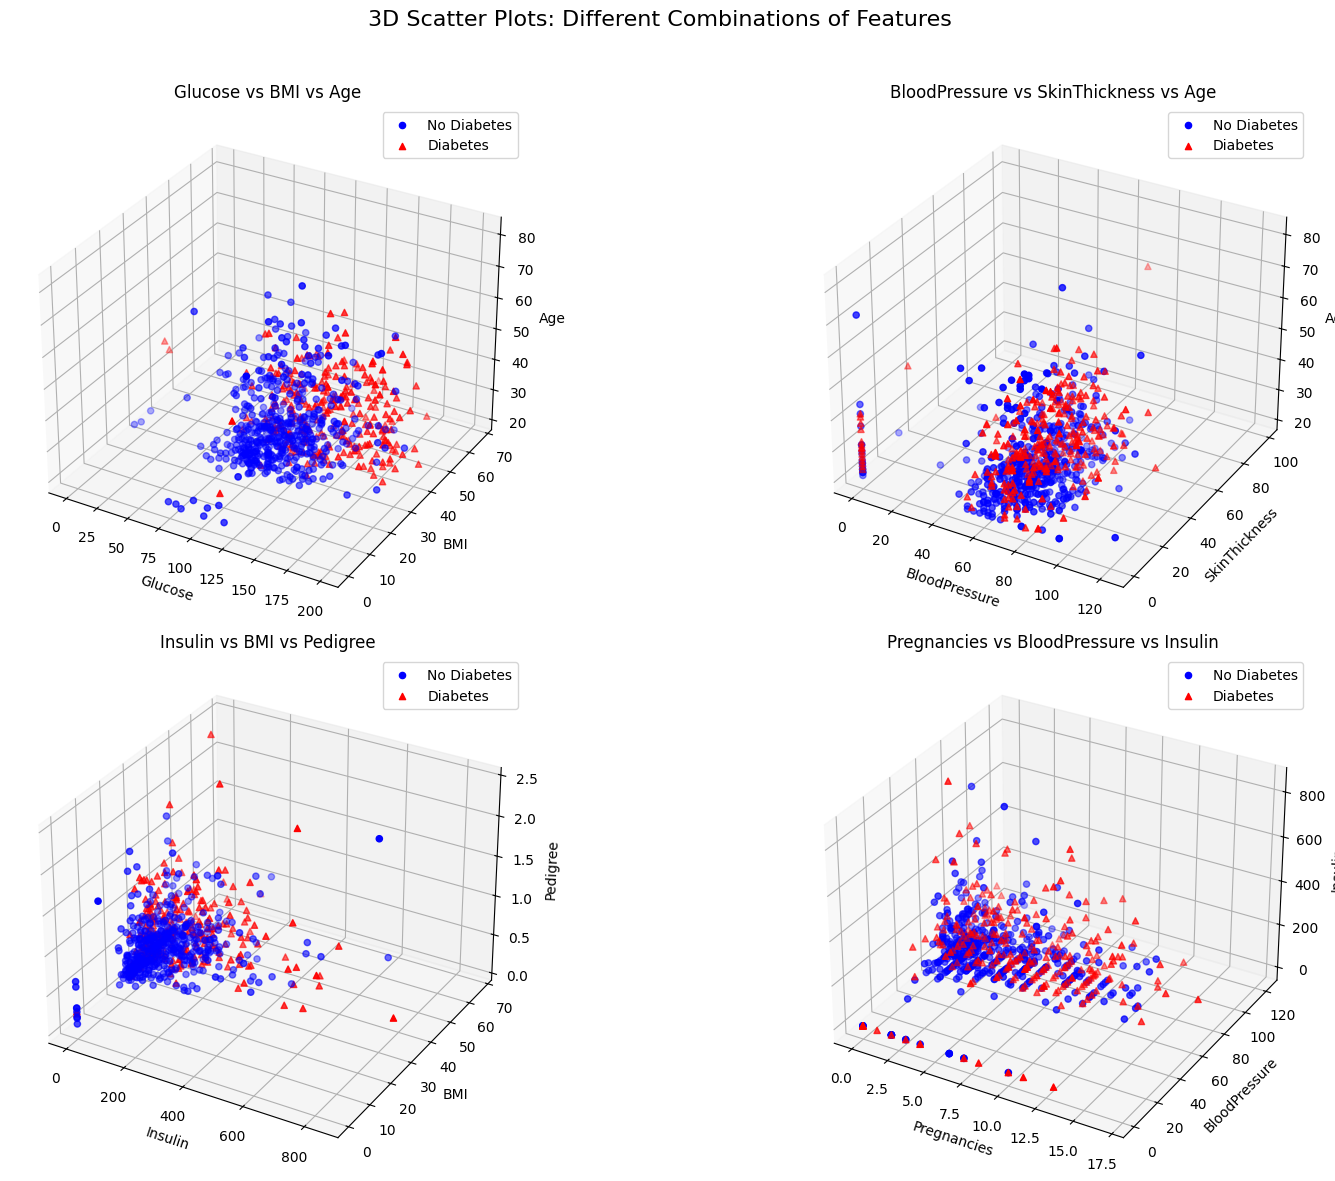

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

df_no_diabetes = data_frame[data_frame['Outcome'] == 0]  # no diabetes
df_diabetes = data_frame[data_frame['Outcome'] == 1]     # has diabetes

fig = plt.figure(figsize=(18, 12))

# 1. Glucose, BMI, Age
ax1 = fig.add_subplot(221, projection='3d')
ax1.scatter(df_no_diabetes['Glucose'], df_no_diabetes['BMI'], df_no_diabetes['Age'], 
            c='blue', marker='o', label='No Diabetes')
ax1.scatter(df_diabetes['Glucose'], df_diabetes['BMI'], df_diabetes['Age'], 
            c='red', marker='^', label='Diabetes')
ax1.set_xlabel('Glucose')
ax1.set_ylabel('BMI')
ax1.set_zlabel('Age')
ax1.set_title('Glucose vs BMI vs Age')
ax1.legend()

# 2. BloodPressure, SkinThickness, Age
ax2 = fig.add_subplot(222, projection='3d')
ax2.scatter(df_no_diabetes['BloodPressure'], df_no_diabetes['SkinThickness'], df_no_diabetes['Age'], 
            c='blue', marker='o', label='No Diabetes')
ax2.scatter(df_diabetes['BloodPressure'], df_diabetes['SkinThickness'], df_diabetes['Age'], 
            c='red', marker='^', label='Diabetes')
ax2.set_xlabel('BloodPressure')
ax2.set_ylabel('SkinThickness')
ax2.set_zlabel('Age')
ax2.set_title('BloodPressure vs SkinThickness vs Age')
ax2.legend()

# 3. Insulin, BMI, Pedigree
ax3 = fig.add_subplot(223, projection='3d')
ax3.scatter(df_no_diabetes['Insulin'], df_no_diabetes['BMI'], df_no_diabetes['Pedigree'], 
            c='blue', marker='o', label='No Diabetes')
ax3.scatter(df_diabetes['Insulin'], df_diabetes['BMI'], df_diabetes['Pedigree'], 
            c='red', marker='^', label='Diabetes')
ax3.set_xlabel('Insulin')
ax3.set_ylabel('BMI')
ax3.set_zlabel('Pedigree')
ax3.set_title('Insulin vs BMI vs Pedigree')
ax3.legend()

# Pregnancies, BloodPressure, Insulin
ax4 = fig.add_subplot(224, projection='3d')
ax4.scatter(df_no_diabetes['Pregnancies'], df_no_diabetes['BloodPressure'], df_no_diabetes['Insulin'], 
            c='blue', marker='o', label='No Diabetes')
ax4.scatter(df_diabetes['Pregnancies'], df_diabetes['BloodPressure'], df_diabetes['Insulin'], 
            c='red', marker='^', label='Diabetes')
ax4.set_xlabel('Pregnancies')
ax4.set_ylabel('BloodPressure')
ax4.set_zlabel('Insulin')
ax4.set_title('Pregnancies vs BloodPressure vs Insulin')
ax4.legend()

# Настройки и отображение графиков
plt.suptitle('3D Scatter Plots: Different Combinations of Features', size=16)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

## 3. Реализация метода k-ближайших соседей 

Метод k-ближайших соседей — для нового примера найти k ближайших соседей в обучающей выборке и присвоить метку класса на основе большинства среди этих соседей.

#### Основные шаги алгоритма:
1. Вычислить расстояние между новым примером и всеми точками обучающей выборки, используя евклидово расстояние:
   $$
   d(x, y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}
   $$
   где x и y — это два примера с n-мерными признаками.

2. Отсортировать всех соседей по расстоянию и выбрать k ближайших.

3. Проголосовать за класс: присвоить новый пример к классу, который наиболее часто встречается среди k ближайших соседей.

Используемые функции: 

1. Функция, для вычисления евклидова расстояния:

In [8]:
import numpy as np
import pandas as pd
from collections import Counter


def euclidean_distance(row1, row2):
    return np.sqrt(np.sum((row1 - row2) ** 2))

2. Функция для реализации метода K-ближайших соседей (определяем расстояния от тестовой точки, определяем классы ближайших точек, присваиваем искомому значению самый частый класс)

In [9]:
def k_nearest_neighbors(X_train, y_train, X_test, k=3):
    y_pred = []  

    for test_point in X_test:
        distances = np.array([euclidean_distance(test_point, x) for x in X_train])
        k_indices = distances.argsort()[:k]
        k_nearest_labels = y_train[k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        y_pred.append(most_common[0][0])

    return np.array(y_pred)

3. Функция для разделения данных на тестовую и обучающую выборки

In [10]:
def train_test_split_manual(X, y, test_size=0.2, random_state=None):
    np.random.seed(random_state)
    indices = np.arange(len(X))
    np.random.shuffle(indices)
    
    test_size = int(len(X) * test_size)
    test_indices = indices[:test_size]
    train_indices = indices[test_size:]
    
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    
    return X_train, X_test, y_train, y_test

4. Функция для создания confusion matrix

In [11]:
def confusion_matrix_pandas(y_true, y_pred):
    return pd.crosstab(pd.Series(y_true, name='Actual'), pd.Series(y_pred, name='Predicted'))

Основной код:

In [21]:
# Разделим данные на тренировочную и тестовую выборки
X = data_frame.drop(columns=['Outcome']).values
y = data_frame['Outcome'].values

# Ручное разделение на тренировочные и тестовые наборы
X_train, X_test, y_train, y_test = train_test_split_manual(X, y, test_size=0.2, random_state=42)

# Модель 1: Случайные признаки
random_columns = np.random.choice(X.shape[1], size=3, replace=False)
X_train_random = X_train[:, random_columns]
X_test_random = X_test[:, random_columns]

# Модель 2: Фиксированный набор признаков
fixed_columns = [1, 5, 7]  # Indices for Glucose, BMI, Age
X_train_fixed = X_train[:, fixed_columns]
X_test_fixed = X_test[:, fixed_columns]

k_values = [3, 5, 10]
# Для каждой модели вычисляем результаты при разных k и строим матрицу ошибок
for k in k_values:
    print(f" k = {k} ")
    
    # Модель 1
    y_pred_random = k_nearest_neighbors(X_train_random, y_train, X_test_random, k)
    cm_random = confusion_matrix_pandas(y_test, y_pred_random)
    print(f"Матрица ошибок для случайных признаков (k={k}):\n{cm_random}")
    
    # Модель 2
    y_pred_fixed = k_nearest_neighbors(X_train_fixed, y_train, X_test_fixed, k)
    cm_fixed = confusion_matrix_pandas(y_test, y_pred_fixed)
    print(f"Матрица ошибок для фиксированных признаков (k={k}):\n{cm_fixed}")


 k = 3 
Матрица ошибок для случайных признаков (k=3):
Predicted   0   1
Actual           
0          78  20
1          25  30
Матрица ошибок для фиксированных признаков (k=3):
Predicted   0   1
Actual           
0          77  21
1          19  36
 k = 5 
Матрица ошибок для случайных признаков (k=5):
Predicted   0   1
Actual           
0          80  18
1          28  27
Матрица ошибок для фиксированных признаков (k=5):
Predicted   0   1
Actual           
0          76  22
1          18  37
 k = 10 
Матрица ошибок для случайных признаков (k=10):
Predicted   0   1
Actual           
0          82  16
1          26  29
Матрица ошибок для фиксированных признаков (k=10):
Predicted   0   1
Actual           
0          79  19
1          20  35
